<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>Dogs vs Cats Prediction with CNN Transfer Learning</b></p>

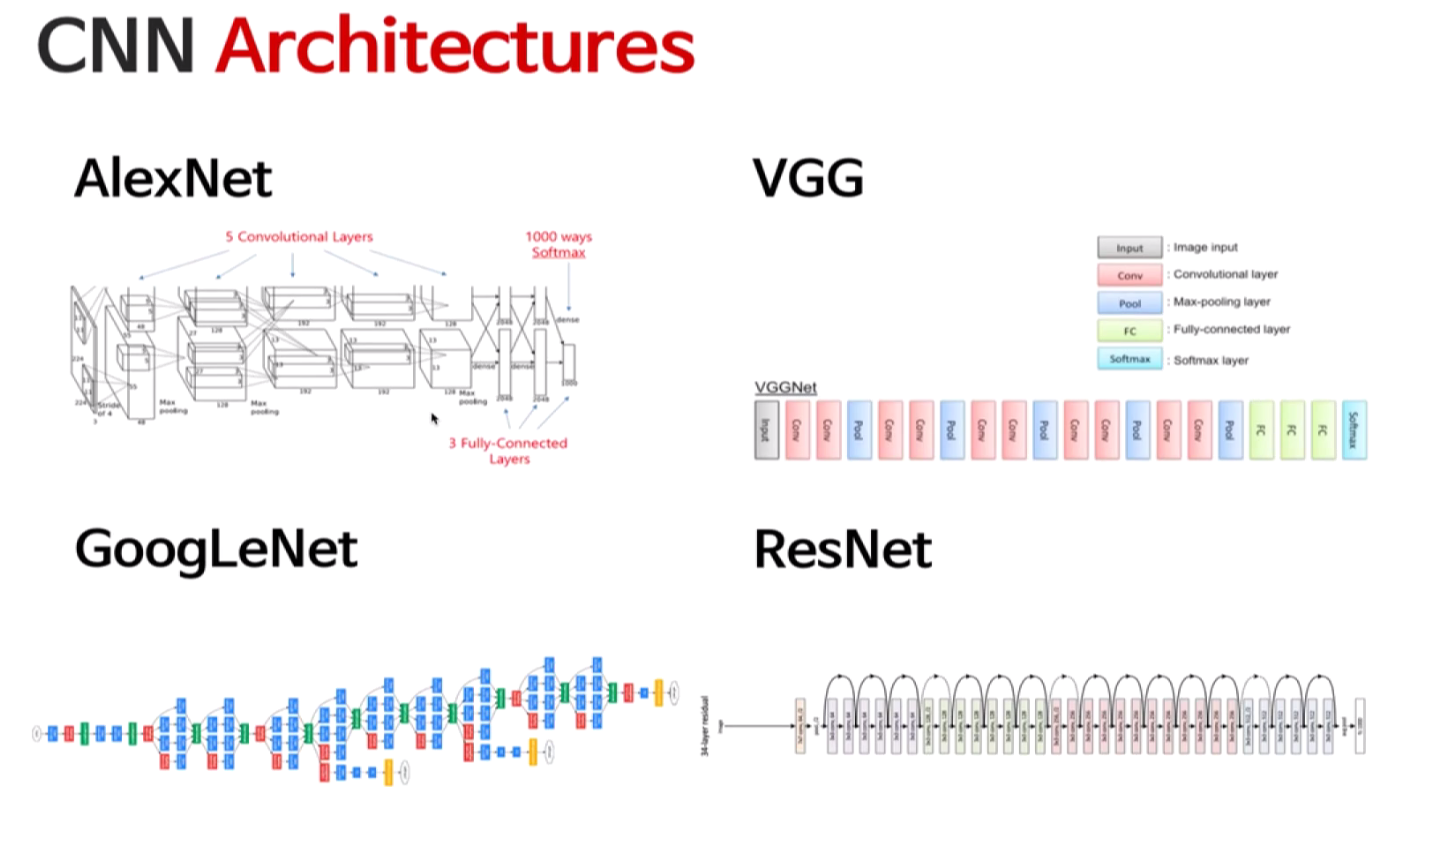

# <font color='orange'> <b>Importing Libraries</b><font color='black'>  

In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# <font color='orange'> <b>Loading The Dataset</b><font color='black'>  

In [6]:
pwd

'D:\\Projects_and_Studies\\Deep_Learning\\00 - Learning_DL\\02 - CNN\\2.4 - CatsVsDogsPrediction'

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [8]:
my_data_dir='dataset/'

In [9]:
os.listdir(my_data_dir)

['test', 'train']

In [10]:
train_path = my_data_dir+'train'
test_path = my_data_dir+'test'

In [11]:
os.listdir(train_path)

['cat', 'dog']

**Let's check how many images there are.**

In [13]:
len(os.listdir(train_path+'/cat'))

12500

In [14]:
len(os.listdir(train_path+'/dog'))

5026

In [15]:
os.listdir(train_path+'/cat')[0]

'cat.0.jpg'

In [16]:
path1=train_path+'/cat'+'/cat.1000.jpg'
path2=train_path+'/dog'+'/dog.1000.jpg'

In [17]:
cat_img=imread(path1)
dog_img=imread(path2)

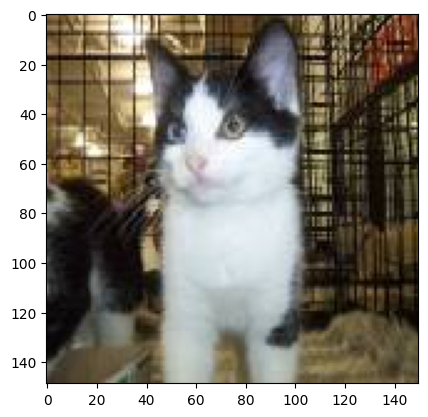

In [18]:
plt.imshow(cat_img);

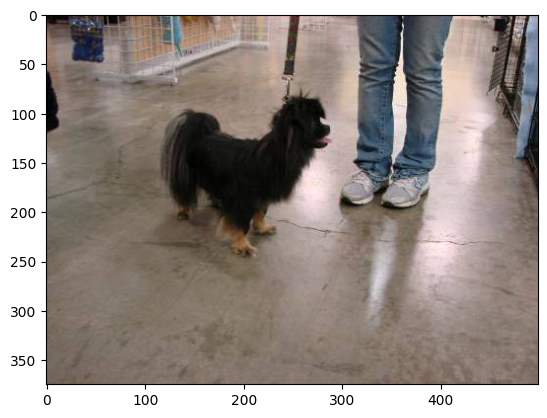

In [19]:
plt.imshow(dog_img);

**Let's decide on the final dimension of these images.**

In [21]:
cat_img.max()

255

In [22]:
cat_img.min()

0

In [23]:
cat_img.shape

(149, 150, 3)

In [24]:
dog_img.shape

(375, 499, 3)

In [25]:
x= []
y = []
for image in os.listdir(train_path+'/cat'):
    
    img = imread(train_path+'/cat/'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

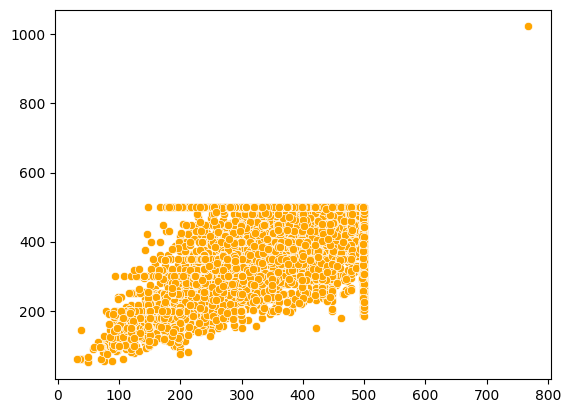

In [26]:
sns.scatterplot(x=x,y=y, color="orange");

In [27]:
np.mean(x)

356.46712

In [28]:
np.mean(y)

410.52264

In [29]:
image_shape = (224, 224,3)

In [30]:
# help(ImageDataGenerator)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [33]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

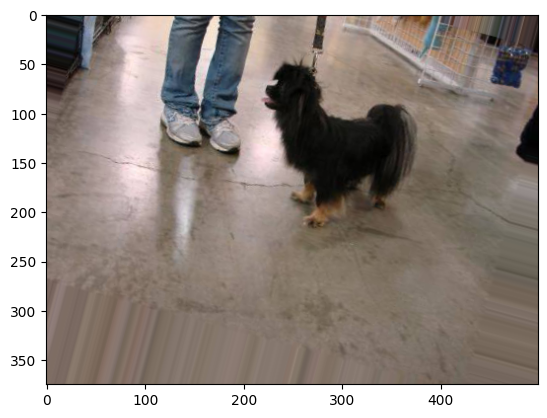

In [34]:
plt.imshow(image_gen.random_transform(dog_img));

image_gen.flow_from_directory(train_path)

# <font color='orange'> <b>Modeling</b><font color='black'>  

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions

In a transfer learning model:
1) `include_top=False` means we are designing the ANN part ourselves.
2) `weights="imagenet"` means pre-trained weights from ImageNet will be used.
3) `layer.trainable=False` ensures the model is not retrained from scratch.

In [39]:
from keras.applications.vgg16 import VGG16

In [40]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=image_shape,
                   pooling='avg',
                   weights= "imagenet")
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))
resnet_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,747,585 (56.26 MB)

 Trainable params: 32,897 (128.50 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

## <font color='gold'> <b>Early Stopping</b><font color='black'>  

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [45]:
batch_size = 64

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(224, 224),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True)

Found 17526 images belonging to 2 classes.


In [47]:
image_gen_test = ImageDataGenerator(rescale=1/255)

test_image_gen = image_gen_test.flow_from_directory(test_path,

                                                   target_size=(224, 224),
                                                   
                                                   color_mode='rgb',
                                                   
                                                   batch_size=batch_size,
                                                   
                                                   class_mode='binary', shuffle=False)

Found 2290 images belonging to 2 classes.


## <font color='gold'> <b>Model Training</b><font color='black'>  

In [84]:
results = resnet_model.fit(train_image_gen,epochs=5,
                    validation_data=test_image_gen,
                    callbacks=[early_stop])

C:\Users\refia\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 1611s 6s/step - accuracy: 0.7961 - loss: 0.4476 - val_accuracy: 0.8773 - val_loss: 0.2882
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 1635s 6s/step - accuracy: 0.9084 - loss: 0.2304 - val_accuracy: 0.8830 - val_loss: 0.2649
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 1637s 6s/step - accuracy: 0.9141 - loss: 0.2107 - val_accuracy: 0.9013 - val_loss: 0.2331
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 1633s 6s/step - accuracy: 0.9198 - loss: 0.1955 - val_accuracy: 0.9127 - val_loss: 0.2150
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 1616s 6s/step - accuracy: 0.9217 - loss: 0.1927 - val_accuracy: 0.9087 - val_loss: 0.2265


In [86]:
from tensorflow.keras.saving import save_model

save_model(resnet_model, 'resnet_model.keras')

# <font color='orange'> <b>Evaluating the Model</b><font color='black'>  

In [88]:
summary = pd.DataFrame(resnet_model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.849481,0.352527,0.877293,0.288211
1,0.908308,0.227430,0.882969,0.264940
2,0.916923,0.205228,0.901310,0.233146
3,0.920176,0.195134,0.912664,0.215016
4,0.922686,0.191561,0.908734,0.226525


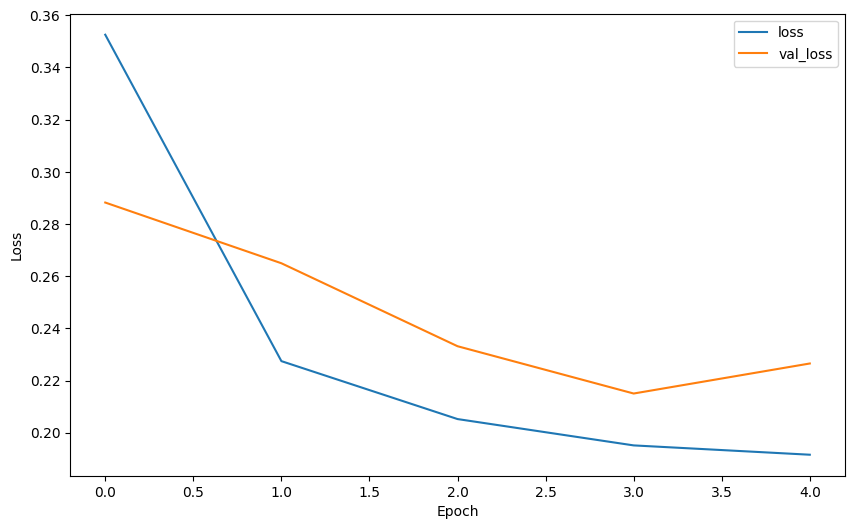

In [90]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

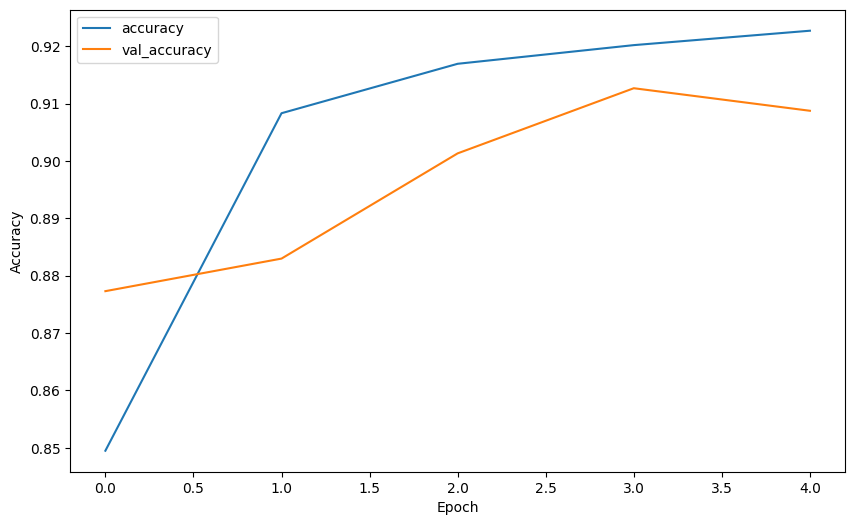

In [92]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [94]:
resnet_model.metrics_names

['loss', 'compile_metrics']

In [96]:
resnet_model.evaluate(test_image_gen)

36/36 ━━━━━━━━━━━━━━━━━━━━ 347s 10s/step - accuracy: 0.9513 - loss: 0.1421


[0.22652529180049896, 0.908733606338501]

In [98]:
pred_probabilities = resnet_model.predict(test_image_gen)

36/36 ━━━━━━━━━━━━━━━━━━━━ 402s 11s/step


In [100]:
pred_probabilities

array([[2.0144583e-04],
       [4.0493575e-01],
       [1.1644951e-05],
       ...,
       [9.9364084e-01],
       [9.8331028e-01],
       [9.9999237e-01]], dtype=float32)

In [102]:
test_image_gen.classes[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [104]:
predictions = pred_probabilities > 0.5

In [106]:
predictions[:50]

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1219
           1       0.96      0.84      0.90      1071

    accuracy                           0.91      2290
   macro avg       0.92      0.90      0.91      2290
weighted avg       0.91      0.91      0.91      2290



In [112]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1180,   39],
       [ 170,  901]], dtype=int64)

# <font color='orange'> <b>Prediction</b><font color='black'>  

In [116]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the model
model = tf.keras.models.load_model('resnet_model.keras')

# Open the new image and convert it to the appropriate format
image = Image.open(r"D:\Projects_and_Studies\Deep_Learning\00 - Learning_DL\02 - CNN\2.4 - CatsVsDogsPrediction\cat.jpg")
image = image.resize((224, 224))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make a prediction
prediction = model.predict(image_array)

# Print the predicted class
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 755ms/step
Predicted class: 0


In [118]:
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the model
model = tf.keras.models.load_model('resnet_model.keras')

# Open the new image and convert it to the appropriate format
image = Image.open(r"D:\Projects_and_Studies\Deep_Learning\00 - Learning_DL\02 - CNN\2.4 - CatsVsDogsPrediction\dog.jpg")
image = image.resize((224, 224))
image_array = np.array(image.convert('RGB')) / 255.0
image_array = np.expand_dims(image_array, axis=0)

# Make a prediction
prediction = model.predict(image_array)

# Print the predicted class
predicted_class = np.argmax(prediction)
print('Predicted class:', predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
Predicted class: 0


<p style="background-color:orange;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>